# Assignment #4

Time spent Nima Hansen: 25 h

Time spend Kailash de Jesus Hornig : 25h

#DAT405 Introduction to Data Science and AI 
##2022-2023, Reading Period 1
## Assignment 4: Spam classification using Naïve Bayes 
There will be an overall grade for this assignment. To get a pass grade (grade 5), you need to pass items 1-3 below. To receive higher grades, finish items 4 and 5 as well. 

The exercise takes place in a notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.



In [1]:
#Download and extract data
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
#!tar -xjf 20021010_easy_ham.tar.bz2
#!tar -xjf 20021010_hard_ham.tar.bz2
#!tar -xjf 20021010_spam.tar.bz2

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [2]:
#!ls -lah

### 1. Preprocessing: 
1.	Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text. Further down (in the higher-grade part), you will be asked to filter out the headers and footers. 
2.	We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`)


Used https://www.youtube.com/watch?v=k9T_7B74Kko as a source
, https://www.tutorialspoint.com/python/os_listdir.htm
, https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column 
, https://www.javatpoint.com/python-os-listdir-method


In [3]:
#pre-processing code here
#imports
import os
import pandas as pd
from sklearn.model_selection import train_test_split

#Creating a function thats takes a folder
def retrieve_files(folder):
    files = []
    #storing each file name of this folder 
    listOfFileNames = os.listdir(folder)
    #for each filename in this list
    for file_name in listOfFileNames:
        #we want to save the full path to this file and open it
        pathToFile = os.path.join(folder, file_name)
        File = open(pathToFile, encoding='latin-1')
        #add the classification, which will be easy ham, hard ham or spam.
        if 'ham' in folder:
            files.append({'Mail': File.read(), 'Class': 'ham'})    
        else:
            files.append({'Mail': File.read(), 'Class': 'spam'})
    return pd.DataFrame(files)

#easy ham dataframe
easy_ham_df = retrieve_files("/work/easy_ham/")
#hard ham dataframe
hard_ham_df = retrieve_files("/work/hard_ham/")
#spam dataframe
spam_df = retrieve_files("/work/spam/")

##splitting the data from the easy_ham into a training and testing set
easy_ham_train, easy_ham_test = train_test_split(easy_ham_df, test_size=0.25, random_state=0)

#splitting the data from the hard_ham into a training and testing set
hard_ham_train, hard_ham_test = train_test_split(hard_ham_df, test_size=0.25, random_state=0)

#Merging the ham datasets together (making sure we have the same proportion of hard and easy as given)
ham_train = easy_ham_train.append(hard_ham_train)
ham_test = easy_ham_test.append(hard_ham_test)

# Splitting the spam-data into training set (75%) and test set (25%).
spam_train,spam_test = train_test_split(spam_df,test_size=0.25,random_state=0)

#### Decisions: 
We decided to do the splitting on the easy_ham, hard_ham and spam separetaly in order to make sure that we both get easy_ham and hard_ham in our training and testing data, in addition we get the same proportions of the 3 types (easy_ham,hard_ham,spam) in the training and test sets as their proportions of the total data that was given and we assume that this data represents the reality well. Using stratify would not help us to do that as both hard_ham and easy_ham have the class ham. Additionally, we choose to have 75% as training data and 25% as testing data.

### 2. Write a Python program that: 
1.	Uses four datasets (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Train a Naïve Bayes classifier (e.g. Sklearn) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in SKlearn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate. Discuss the differences between these two classifiers. 





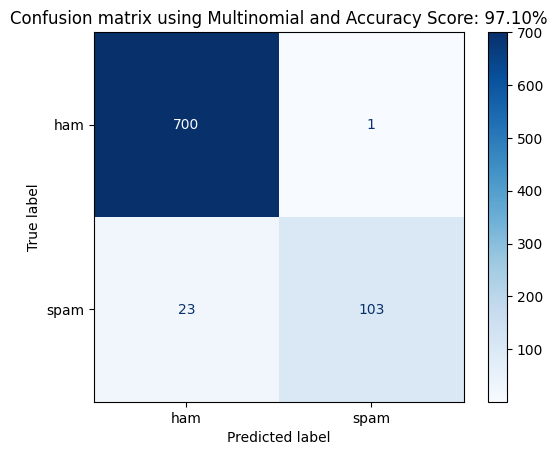

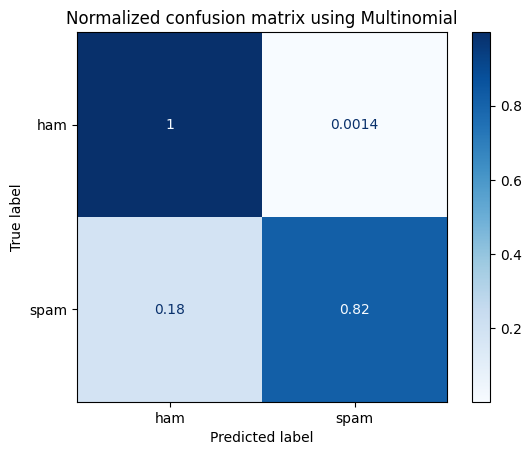


 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (MNB):
 it's ham and predicted as ham (TP-Rate): 0.9985734664764622 
 it's ham but predicted as spam (FN-rate): 0.0014265335235378032

 it's spam but predicted as ham (FN-rate): 0.18253968253968253 
 it's spam and predicted as spam (TP-Rate): 0.8174603174603174


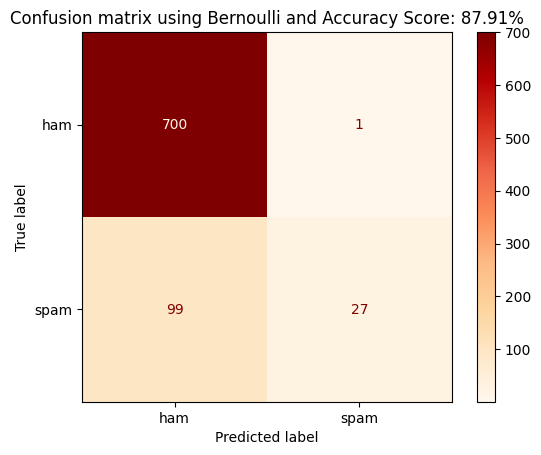

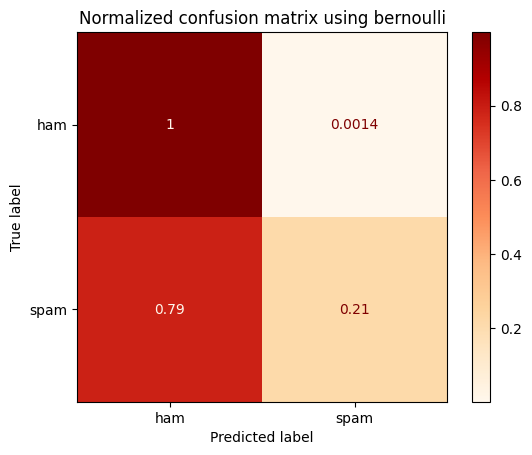


 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (BNB):
 it's ham and predicted as ham (TP-Rate): 0.9985734664764622 
 it's ham but predicted as spam (FN-rate): 0.0014265335235378032

 it's spam but predicted as ham (FN-rate): 0.7857142857142857 
 it's spam and predicted as spam (TP-Rate): 0.21428571428571427


In [4]:
#Imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import warnings

#remove the future warning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

#setting up the train variables and test variables
x_train = ham_train["Mail"].append(spam_train["Mail"])
x_test = ham_test["Mail"].append(spam_test["Mail"])
y_train = ham_train["Class"].append(spam_train["Class"])
y_test = ham_test["Class"].append(spam_test["Class"])

#Create the vectorizer object and and transforming the email texts into vectors
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)

#Creating a multinomial classifier and training it.
multinomial_classifier = MultinomialNB()
multinomial_classifier.fit(x_train_vectorized, y_train)

#Creating a benroulli classifier and training it.
bernoulli_classifier = BernoulliNB()
bernoulli_classifier.fit(x_train_vectorized,y_train)

#Creating a method that uses the multinomial classifier that was trained
#Takes three parameters, the test data of x (mails), test data of y (class) and a boolean value
def multi_class(x_test,y_test,plot_confusion = False):
    
    #Transforming the x_test data that was passed into vectors
    x_test_vectorized = vectorizer.transform(x_test) #transforming

    #Predicting the classifications based on x_test
    multinomial_predictions = multinomial_classifier.predict(x_test_vectorized)

    #calculating the accuracy
    Accuracy_multinomial = accuracy_score(y_test, multinomial_predictions)

    #If our boolean = true, we create two confusion matrixes of which one is normalized
    #We also include the accuracy in the titel.
    if plot_confusion == True:
        titles = [
        ('Confusion matrix using Multinomial and Accuracy Score: {:.2%}'.format(Accuracy_multinomial), None),
        ('Normalized confusion matrix using Multinomial', "true"),
        ]
        #plotting confusion matrix
        for title, normalize in titles:
            display = plot_confusion_matrix(
                multinomial_classifier,
                x_test_vectorized,
                y_test,
                cmap=plt.cm.Blues,
                normalize=normalize,)
            display.ax_.set_title(title)
        plt.show()
    #generating and printing the false negative rate and true positive rate
    tp, fn, fp, tn = confusion_matrix(y_test, multinomial_predictions,normalize='true').ravel()
    print("\n The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (MNB):")
    print(" it's ham and predicted as ham (TP-Rate):",tp, "\n it's ham but predicted as spam (FN-rate):" ,fn)
    print("\n it's spam but predicted as ham (FN-rate):",fp, "\n it's spam and predicted as spam (TP-Rate):" ,tn)

    #if we plotted confusion, we already have the accuracy. So only if boolean=false we print it
    if(plot_confusion==False):
        print(" this is the models accuracy using multinomial classifier:", Accuracy_multinomial)

#Creating a method that use the bernoulli classifier that was trained
#samme comments here just that we use the bernoulli classifier instead of multinomial
def bernoulli_class(x_test,y_test,plot_confusion=False):

    x_test_vectorized = vectorizer.transform(x_test) #transforming
    bernoulli_predictions = bernoulli_classifier.predict(x_test_vectorized)
    Accuracy_bernoulli = accuracy_score(y_test, bernoulli_predictions)

    if(plot_confusion==True):
        titles = [
        ('Confusion matrix using Bernoulli and Accuracy Score: {:.2%}'.format(Accuracy_bernoulli), None),
        ('Normalized confusion matrix using bernoulli', "true"),
        ]
        for title, normalize in titles:
            display = plot_confusion_matrix(
                bernoulli_classifier,
                x_test_vectorized,
                y_test,
                cmap=plt.cm.OrRd,
                normalize=normalize,
            )
            display.ax_.set_title(title)
        plt.show()

    tp, fn, fp, tn = confusion_matrix(y_test, bernoulli_predictions,normalize='true').ravel()
    print("\n The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (BNB):")
    print(" it's ham and predicted as ham (TP-Rate):",tp, "\n it's ham but predicted as spam (FN-rate):" ,fn)
    print("\n it's spam but predicted as ham (FN-rate):",fp, "\n it's spam and predicted as spam (TP-Rate):" ,tn)

    if(plot_confusion==False):
        print(" this is the models accuracy using bernoulli classifier:", Accuracy_bernoulli)

#this will be our program which we will use
#This program assumes that the classifiers are trained before
def program(x_test,y_test,plot_confusion=False):
    multi_class(x_test,y_test,plot_confusion=plot_confusion)
    bernoulli_class(x_test,y_test,plot_confusion=plot_confusion)

program(x_test,y_test,True)

##### Comparison between the two classifiers
Bernoulli Naive Bayes (BNB) considers the presence/absence of a feature (a word in this case) wheras Multinomial Naive Bayes (MNB) considers the number of counts of a feature. The multinomial classifier uses multinomial distributed data for the algorithm and the Bernoulli classifier uses multivariate bernoulli distributed data. 

So in action this translates to the following: when we train our model based on different classifiers we create probabilities for a certain word given a class, see expression P(word x|class). Using the idea that a certain word can be typical for a certain class and hence an good indicator for this class. When then classifying a unknown mail (one of our test mails), the probability for each word given a certain class is accumulated. Eventually, the posterior (the probability of a certain class given all the words in this mail) for both classes is calculated and the mail will be assigned to the one with the highest probability.

The main difference here is that BNB calculates its probability for a word given a class based on whether a feature/word is present in an individual mail or not (binary values only) and then counts the number of mails where the word is present divided by the total number of mails. Additionally, BNB can also explicitly use the term for the probability of a word being absent instead of present depending on a binary variable (as seen in the probability formula for BNB in the documentation given in the exercise). While MNB calculates its probability based of how many instaces of a certain word there are divided by how many words there are in total and this for a grand pool of words from all mails. 

Documentation given in exercise:
https://scikit-learn.org/stable/modules/naive_bayes.html

##### Important explanation
As the confusion matrix divides the quadrants into the values: true positive, false negatives, false positive, true negative. Therefore it is hard to use the concepts true positive and false negative since positive will either be defined as ham or spam and negative will be the one who is not positive. So as you ask for true positive, and false negative we simply believe that you mean that true positive is when we have predicted right, and false negative, when we have predicted wrong.
(https://www.researchgate.net/figure/Example-of-confusion-matrix-True-Positive-TP-The-number-of-instances-that-a-model_fig1_329526806)

In the case of testing ham we have that true positive = true ham (its ham and predicted as ham) while false negative = false spam (its ham but predicted as spam).

In the case of testing spam we have that true positive = true spam (its spam and predicted as spam), and false negative=false ham (its spam but predicted as ham)

##### The analysis
By looking at the plots and the corresponding prints, we can note that the accuracy of the model is much higher using the multinomial classifier instead of the bernoulli classifier (97.1 vs 87.9). In addition we can identify that both the classifiers have a very high and even the same value of the true positive rate (TP-rate) for the ham_test which is important as you do not want ham mails to be classified as spam mails, we believe that it's better the other way around.

However, we can identify an significant difference when looking at the true positive rates for the spam_test where the multinomial classifier generates a much higher value. This indicates that the multinomial classifier is much better at determining what mails are spam. Wheras the bernoulli classifier often misclassifies what should be spam for ham (79% of the time).

### 3.Run your program on 
-	Spam versus easy-ham 
-	Spam versus hard-ham.

#### Our assumptions
We assume that you want us to still have our classifiers trained on the data containing the whole training set (easy_ham_train and hard_ham_train, spam_train) and investigate the difference when first classifying solely easy_ham VS spam, and secondly clasifying hard_ham VS spam.

#### Easy ham vs Spam

In [5]:
#We already have the easy ham training and testing data
#setting up the train variables and test variables
x_test_1 = easy_ham_test["Mail"].append(spam_test["Mail"])
y_test_1 = easy_ham_test["Class"].append(spam_test["Class"])
program(x_test_1,y_test_1)


 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (MNB):
 it's ham and predicted as ham (TP-Rate): 1.0 
 it's ham but predicted as spam (FN-rate): 0.0

 it's spam but predicted as ham (FN-rate): 0.18253968253968253 
 it's spam and predicted as spam (TP-Rate): 0.8174603174603174
 this is the models accuracy using multinomial classifier: 0.9698952879581152

 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (BNB):
 it's ham and predicted as ham (TP-Rate): 1.0 
 it's ham but predicted as spam (FN-rate): 0.0

 it's spam but predicted as ham (FN-rate): 0.7857142857142857 
 it's spam and predicted as spam (TP-Rate): 0.21428571428571427
 this is the models accuracy using bernoulli classifier: 0.8704188481675392


#### Results of classifying easy ham and spam mails
MNB - Looking at the results from this model it has an overall accuracy of about 97%. The correct detection of ham (true positive rate) is 100% and the detection of spam (true positive rate) is 82%. Most importantly, we do not have any false negatives for the ham test which means that no important ham mail will be classified as spam.  

BNB - Looking at the results from this model it has an overall accuracy of about 87%. The correct detection of ham as ham is also 100% but the spam as spam is only 21%. However, we still have no false negatives for ham test which is good!

#### Hard ham vs Spam

In [6]:
#Hardham vs spam
#We already have the hard_ham training and testing data
#setting up the train variables and test variables
x_test_2 = hard_ham_test["Mail"].append(spam_test["Mail"])
y_test_2 = hard_ham_test["Class"].append(spam_test["Class"])
program(x_test_2,y_test_2)


 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (MNB):
 it's ham and predicted as ham (TP-Rate): 0.9841269841269841 
 it's ham but predicted as spam (FN-rate): 0.015873015873015872

 it's spam but predicted as ham (FN-rate): 0.18253968253968253 
 it's spam and predicted as spam (TP-Rate): 0.8174603174603174
 this is the models accuracy using multinomial classifier: 0.873015873015873

 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (BNB):
 it's ham and predicted as ham (TP-Rate): 0.9841269841269841 
 it's ham but predicted as spam (FN-rate): 0.015873015873015872

 it's spam but predicted as ham (FN-rate): 0.7857142857142857 
 it's spam and predicted as spam (TP-Rate): 0.21428571428571427
 this is the models accuracy using bernoulli classifier: 0.4708994708994709


#### Results of classifying hard ham and spam mails
MNB - Looking at the results from this model it has an overall accuracy of about 87%. The correct detection of ham as ham is ≈ 98% and the detection of spam is ≈ 82%. Here we unfortunately, misclassify som ham mails into spam which is not that good as there is a risk of missing important mails.   

BNB - Looking at the results from this model it has an overall accuracy of about 47%. The correct detection of ham as ham is also ≈ 98% but the detection of spam is only 21%. Here we also misclassify around 2 percent of all ham mails into spam. We could also see a significant increase in the miss classifications of spam mails to ham, thus a increase in the false negative rate for spam.



#### Comparison of the classifiers' performance on easy ham vs hard ham

- MNB
    - Using easy ham & spam versus hard ham & spam for MNB:
        - easy ham & spam: Overall accuracy = 97%, detection of ham = 100%, detection of spam = 82%
        - hard ham & spam: Overall accuracy = 87%, detection of ham = 98%, detection of spam = 82% 
    - analysis: The MNB method is doing better in classifying easy ham compared to the hard ham. However, its just a difference of 2% of the detection of ham. I.e. the only difference is that model missclassifies ham 2% of the time --> increases the false negative rate and decreases true positive rate with 2%.

- BNB
    - Using easy ham & spam versus hard ham & spam for BNB:
        - easy ham & spam: Overall accuracy = 87%, detection of ham = 100%, detection of spam = 21%
        - hard ham & spam: Overall accuracy = 47%, detection of ham = 98%, detection of spam = 21%
    - analysis: The BNB method is also doing better in classifying easy ham compares to hard ham. The spam detection is however the same. Its also just a difference of 2% in the detection of hams here.

- BNB versus MNB: There is no difference in ham detection (true positive rate) when both uses the same type of ham. However, the spam detection was clearly better with MNB than with BNB, as this percentage value decreased with 61% units when using BNB --> Will classify much more spam mails as ham, this is the same results that we saw in A and its not strange that the true positive rate for spam will remain the same for the two different classifiers as we have not changed our spam tests or re-trained the model, the only difference is that we test hard ham and easy ham separate.   

##### To conclude:

The most outstanding differences when changing from easy to hard ham samples are that the overall accuracy went down 10% units for MNB and 40% units for BNB. 

For the MNB model on the two tests:  The difference comes solely from the increased false negative rate for ham --> harder ham was misclassified into spam. Due to the total number of samples in the harder test being only a tenth of the total number of easy samples, the slight difference in going from 100% TP-rate (in easy) to 98% (in hard) had a -10% units impact on the overall accuracy.

For the BNB model on the two tests: the overall accuracy dropped with -40% units for the very same reason, again a slight difference of going from 100% TP-rate (in easy) to 98% (in hard) for the ham were amplified. I.e the only difference lies in the missclassification of ham mails, and here both models' false negative rates for ham (missclassification of ham) increased equally much when classifying harder ham.
 

### 4. To avoid classification based on common and uninformative words it is common to filter these out. 

**a.** Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 



Given that we define common words as words that are present in most of the mails (both ham and spam), these common words will be very uninformative and not contribute with any relevant information for the task of deciding if a mail is a spam or ham, or at least they should not have the power to have that impact. Therefore, filtering out this noise/common words to avoid classification on those should increase the performance of the model. 

Looking at uncommon words, words that only appear a few times, maybe a few times in one single email or once in a relatively low number of mails, should also be very uninformative. These words are too uncommon to be considered a keyword in classifying whether the mail is ham or spam, so we do not believe that the classification will improve in terms of "accuracy" or that they ever had a chance of changing the predictions. However, we will remove unnecessary data and increase the performance by making the program faster. 

#### a) All code for a

In [7]:
#Imports
from collections import Counter

#Creating a method that return an df with the words from the passed df from most common --> least
def Word_freq_counter(dataset):
    dataset = " ".join(dataset['Mail'])

    #count each word appearence
    dataset_counted= Counter(dataset.split())

    #sort the ham_df based on most common elements (highest count to lowest count).
    dataset_sorted = dataset_counted.most_common()
    #Creates a dataframe from ham_sorted and change to relevant column names 
    df = pd.DataFrame.from_dict(dataset_sorted).rename(columns={0:'Words',1:'Nr of Occurences'})
    return df

In [8]:
#creating a dataset with all the mails (and classes)
ham_df = easy_ham_df.append(hard_ham_df)
dataset = ham_df.append(spam_df)

# Run word occurance counting method
dataset_words = Word_freq_counter(dataset)

#Common words are those words mentioned (on avarage) more than once per mail 
Common = dataset_words[dataset_words['Nr of Occurences'] > len(dataset)]

#Uncommon words are those words mentioned less than 2 times --> just once
Uncommon = dataset_words[dataset_words['Nr of Occurences'] < 2]

# Fetching only the words, eliminating the occurances
Common_words = Common['Words']
Uncommon_words = Uncommon['Words']

#we decide to not print out lists of these words as this will take a lot of space
#instead we show the number of words that have been selected as common and uncommon for each "class"
print('10 of the most common words \n',Common_words.head(10),'\n')
print('10 of the most uncommon words \n',Uncommon_words.head(10),'\n')
print('Number of common words:',len(Common_words))
print('Number of uncommon words:',len(Uncommon_words))

our_stopwords = Common_words.append(Uncommon_words).tolist()
print(len(our_stopwords))

10 of the most common words 
 0     the
1    2002
2      to
3       >
4     for
5    with
6    from
7      by
8      of
9     and
Name: Words, dtype: object 

10 of the most uncommon words 
 74884                                             15:45:52
74885    <LNBBLJKPBEHFEDALKOLCIECBBDAB.tim.one@comcast....
74886                                            maximally
74887                                               clumsy
74888                                              tokens.
74889                                                 ham"
74890                                  tokenize_body(self,
74891                        retain_pure_html_tags=False):
74892                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^
74893                                          """Generate
Name: Words, dtype: object 

Number of common words: 57
Number of uncommon words: 114396
114453


Above we have chosen to not print all of the words, as these series are too long. However, as we see, we have words like "to","with", "from", "by" and e.g "or" which are words that are very uninformative and many are also english stop words. They are uninformative in that sense that they are not going to be of importance for determining if a mail is spam or ham. Uniquely occuring words will also be of this uninformative type, as if a word is only mentioned once, it will with certainty never be found in another mail and this word will then be useless as it is neither representative for spam or ham.

**b.** Use the parameters in Sklearn’s `CountVectorizer` to filter out these words. Update the program from point 3 and run it on your data and report your results.

You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you. Argue for your decision-making.

As the task indicates, we can also use parameters in sklearns CountVectorizer to filter out common/uncommon words. There are three different parameters that can be used for our problem which we will explain below.

- stopwords: By using stopwords = 'english', a built in list of english stop words e.g. "and,the and him" will be ignored by our two classifiers. As we can expect these words plenty of times in both spam- and ham-mails, we can conclude that these words are very uninformative when trying to decide whether a mail is a spam or not. Therefore it makes sense using english stopwords to make our classifiers just focus on informative words.

- max_df: Using max_df we can choose to ignore commonwords by removing words appearing to frequently. By using for example max_df = 0.8, we will ignore all words that appear in more than 80% in all the mails. If we instead set an int, lets say 100, we will ignore words that occur in more than 100 mails.

- min_df: Using min_df in contrast, we can choose to ignore uncommon words that appear too infrequently. For example, using min_df = 0.2, we will ignore all words that appear in less than 20% of the mails. The same applies here, if we set an int, lets say 5. We will ignore all words that appear less than in 5 mails.


In [9]:
print(len(spam_df)/(len(ham_df)+len(spam_df)))
print(len(spam_df))

0.15172622652937615
501


#### Important to emphasize: 
There are some values that we would not want to pass for both max_df and min_df. For example, out of all our data (spam and ham), we have almost 85% ham as seen above (1-0.15). Lets say that there is some word that is only in all the ham mails, if we then remove all words that occur more than 84% we will remove all these words even tough they are very informative! We need to make sure that we set the proportion > 0.85 and are very strict with what is to be considered as common given our unbalanced data of ham and spam as there is a risk of removing keywords (i.e words helping classifying right) for ham. --> we will choose a max_df of (0.85+0.075=0.925) just to make sure that if every ham mail contains this word, we only remove these words if also half of the spam mails contains this word .

It is also important to take into consideration when setting the min_df values. For example, lets say that there is some word that is only in the spam mails, we have approximately 15% spam mails, and we then remove all words that appear in less than 16% of all the mails, we could remove words that are very significant for the min_df. Here we could maybe use an integer instead, e.g just removing words that are mentioned in less than 5 mails. What's important to take out of this is that we also need to be very strict with what is to be considered as uncommon word given our balanced data, as there is a risk of removing key characteristics for spam. Here we will use an integer instead, we will use an integer value of 10. Removing all words that are not mentioned in at least 10 mails, then we should not have to worry about removing a key word from spam as it should not be a key word for identifying spam if it appears in less than 10 mails.

#### How to determine which option to choose:
After reading about how sklearns can do this for us, we chose this option since we believe that this is the best option.

Why? For example if word "x" is mentioned 12 times in one mail our own method will not define this as an uncommon word as the total count is higher than 1 (given our previus limits in a) and we only consider how many times the words appear in the total data. In contrast, it will be ignored by sklearns as sklearn considers either how many mails the specific word has appeared in, or the proportions of mails of that it has appeared in. For example, min_df=10, will remove all words that are mentioned in less than 10 mails (we have covered how max_df and min_df works above). So in short, we believe that sklearn's method is smarter. However, there are some negative aspects too. Such as the need to consider worst case scenarios, for example putting a to high min_df removing all words that are essential for determining which mails are spam (more on this was covered above).

We will try to filter our data by letting sklearn do it for us by using stopwords = "English", max_df = 0.925 and min_df=10 (we argued for why chosing these values above). We could also use trial and error and test until we got the best possible results, however we don't think that this is the aim of the task.


In [10]:
#creating object and letting sklearn ignore those words for us
vectorizer = CountVectorizer(max_df = 0.925, min_df=10,stop_words='english') 

#transforming the email texts into vectors using our new vectorizer
x_train_vectorized = vectorizer.fit_transform(x_train) #fitting it on x train and transforming

#Training our classifiers on the updated x_train_vectorized
multinomial_classifier.fit(x_train_vectorized, y_train)
bernoulli_classifier.fit(x_train_vectorized,y_train)

print('_________________Running on Spam vs easy-ham_________________')
program(x_test_1,y_test_1)
print("\n _________________Running on Spam vs hard-ham_________________")
program(x_test_2,y_test_2)

_________________Running on Spam vs easy-ham_________________

 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (MNB):
 it's ham and predicted as ham (TP-Rate): 0.9952978056426333 
 it's ham but predicted as spam (FN-rate): 0.004702194357366771

 it's spam but predicted as ham (FN-rate): 0.047619047619047616 
 it's spam and predicted as spam (TP-Rate): 0.9523809523809523
 this is the models accuracy using multinomial classifier: 0.9882198952879581

 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (BNB):
 it's ham and predicted as ham (TP-Rate): 0.9968652037617555 
 it's ham but predicted as spam (FN-rate): 0.003134796238244514

 it's spam but predicted as ham (FN-rate): 0.023809523809523808 
 it's spam and predicted as spam (TP-Rate): 0.9761904761904762
 this is the models accuracy using bernoulli classifier: 0.993455497382199

 _________________Running on Spam vs hard-ham_____________

#### Analysis - Comparing the results to the results in task 3
We can see a big difference for the results of part three! The percentage before the arrow "-->" is the earlier result, and the percentage after the arrow is our new result after removing common and to uncommon words. Note that detection of ham/spam = True positive rate of ham/spam. And the false negative rate then equals 1-true positive rate.
 
- MNB (task 3 --> task 4)
    - Using easy ham & spam versus hard ham & spam for MNB:
        - easy ham & spam: Overall accuracy = 97% --> 99% , detection of ham = 100% --> 100%, detection of spam = 82% --> 95%
        - hard ham & spam: Overall accuracy = 87% --> 93%, detection of ham = 98% --> 87%, detection of spam = 82% --> 95% 
     
- BNB (task 3 --> task 4)
    - Using easy ham & spam versus hard ham & spam for BNB:
        - easy ham & spam: Overall accuracy = 87% --> 99%, detection of ham = 100% --> 100%, detection of spam = 21% --> 98%
        - hard ham & spam: Overall accuracy = 47% --> 92%, detection of ham = 98% --> 81%, detection of spam = 21% --> 98%

#### To conclude: 
After removing to common and uncommon words we can see that the overall accuracy has increased for all tests (easy ham & spam as well as for hard ham & spam) despite which classifier that is used.  We can see that the biggest difference is the improvement of spam detection (True positive rate (TP-rate) for spam), the biggest difference is seen for the BNB classifier where we went from 21% (TP-rate) to 98% in both cases. However, we can see that the true positive rate for ham has decreased for both classifiers using hard_ham. One reason could be that we didn't really consider the proportion hard_ham of the total dataset (250/3302 = 0.075) when setting min_df and we may have removed words that well characterize hard ham mails. Additionally, earlier we had a pretty low value on the detection of spam, and the cost of increasing our TP-rate on spam is a decrease in the TP-rate for ham. Earlier our model was very prone to classify mails to ham and then its not strange that the TP-rate for ham was very high.



Comment: Below is the code we would have used if we were to use our own stopwords (we have tested it and it works)

In [11]:
#import warnings
#warnings.filterwarnings("ignore")

#This time we will use our words we generated in a) as stopwords
#vectorizer = CountVectorizer(stop_words=our_stopwords) #creating object
#x_train_vectorized = vectorizer.fit_transform(x_train) #fitting it on x train and transforming

#Training and fitting the data with the multinomial naive bayes classifier
#multinomial_classifier.fit(x_train_vectorized, y_train)

#Training the data with the bernoulli naive bayes classifier
#bernoulli_classifier.fit(x_train_vectorized,y_train)

#print('_________________Running on Spam vs easy-ham_________________')
#program(x_test_1,y_test_1)
#print("\n _________________Running on Spam vs hard-ham_________________ ")
#program(x_test_2,y_test_2)

### 5. Eeking out further performance
Filter out the headers and footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 
-	Does the result improve from 3 and 4? 

#### Headers & Footers
We assume that you still want us to use the filtering method that we used in task 4 and in addition filter out headers and footers of the tests emails before running our program again. So we will simply filter out the headers and footers from the test data and then run task 3 on them with the same vectorizer and trained classifiers as in task 4 and then compare the results we got now with those that we got in task 3 and task 4. In the analysis it will look like this "result task 3 --> result task 4 --> result task 5"

When analyzing the mails in easy_ham and spam most it seems like most of the actuall content in the different mails start after the first blank row has occured. In addition, most footers seems to start after a new row and "--". This is however not true for hard_ham as the format is different in many of those files. But as a perfect filtering is not required,we will remove everything before two "\n\n", and then remove everything thats after "--"

In [12]:
#For each email, remove everything before the first blank row and delete everything after --
easy_ham_test["Mail"] = easy_ham_test["Mail"].str.split('\n\n', 1, expand=True)[1]
easy_ham_test["Mail"] = easy_ham_test["Mail"].str.split('\n--', 1, expand=True)[0]
hard_ham_test["Mail"] = hard_ham_test["Mail"].str.split('\n\n', 1, expand=True)[1]
hard_ham_test["Mail"] = hard_ham_test["Mail"].str.split('\n--', 1, expand=True)[0]

#This is our new test variables for easy ham vs spam and hard ham vs spam
x_test_1 = easy_ham_test["Mail"].append(spam_test["Mail"])
y_test_1 = easy_ham_test["Class"].append(spam_test["Class"])

x_test_2 = hard_ham_test["Mail"].append(spam_test["Mail"])
y_test_2 = hard_ham_test["Class"].append(spam_test["Class"])

In [13]:
print('_________________Running on Spam vs easy-ham_________________')
program(x_test_1,y_test_1)
print("\n _________________Running on Spam vs hard-ham_________________")
program(x_test_2,y_test_2)

_________________Running on Spam vs easy-ham_________________

 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (MNB):
 it's ham and predicted as ham (TP-Rate): 0.9905956112852664 
 it's ham but predicted as spam (FN-rate): 0.009404388714733543

 it's spam but predicted as ham (FN-rate): 0.047619047619047616 
 it's spam and predicted as spam (TP-Rate): 0.9523809523809523
 this is the models accuracy using multinomial classifier: 0.9842931937172775

 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (BNB):
 it's ham and predicted as ham (TP-Rate): 1.0 
 it's ham but predicted as spam (FN-rate): 0.0

 it's spam but predicted as ham (FN-rate): 0.023809523809523808 
 it's spam and predicted as spam (TP-Rate): 0.9761904761904762
 this is the models accuracy using bernoulli classifier: 0.9960732984293194

 _________________Running on Spam vs hard-ham_________________

 The False Negative Rates

#### Analysis - Comparing the results to the results in task 3,4 and 5
The percentage before the first arrow "-->" is the result from task 3, the percentage after the first arrow is our result from task 4 and the last percentage after the second arrow is our new result in task 5.

- MNB (task 3 --> task 4 ---> task 5 headers and footers)
    - Using easy ham & spam versus hard ham & spam for MNB: 
        - easy ham & spam: Overall accuracy = 97% --> 99% --> 98%, detection of ham = 100% --> 100% --> 99% , detection of spam = 82% --> 95% --> 95%
        - hard ham & spam: Overall accuracy = 87% --> 93% --> 92% , detection of ham = 98% --> 87% --> 86%, detection of spam = 82% --> 95% --> 95%
     
- BNB (task 3 --> task 4 ---> task 5 headers and footers)
    - Using easy ham & spam versus hard ham & spam for BNB:
        - easy ham & spam: Overall accuracy = 87% --> 99% --> 100% (99.6%), detection of ham = 100% --> 100% --> 100%, detection of spam = 21% --> 98% --> 98%
        - hard ham & spam: Overall accuracy = 47% --> 92% --> 89%, detection of ham = 98% --> 81% --> 73%, detection of spam = 21% --> 98% --> 98%

##### To conclude
The overall accuracy has almost not moved at all, for the MNB classifier, the TP-rate for ham and spam has no significant change, only one percentage here and there. This also almost applies for the BNB classifier. However, we can note that we had an pretty high decrease in the TP-rate when testing hard ham using the BNB classifier. Something worth to emphasize is that we didn't really find a good method for filtering out the footers for the hard ham as we didn't identify a stable pattern of how the mails start and end as the formats were so different and mixed. This can be one of the reason for why we see a decrease on the TP-rate when testing hard ham for both the BNB classifier and MNB classifer, most significant for the BNB classifier. 

- The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies? 

___Answer) The split can give very skewed results if we recieve a very unblanaced number of the two different classes in the training and test set. e.g, if we would get a training set with almost only hams while the test set includes both spam and ham. If the model is almost only trained on ham-data,it would be very bad at predicting spam as it does not have a sufficient amount of data to learn which words that characaterize spam --> it would probably classify most emails as ham even though it's spam. 

This could be solved by using "Stratify =dataframe['Class']". Which will then make sure that the proportions of classes (ham,spam) will be the same in the training and testing set as the proportion of classes (ham,spam) in the stratify parameter (Dataframe['Class']). After doing this, there is still remaining a risk that we almost only will have the "easy_ham" in the training set as both easy_ham and hard_ham are lying under the same class (ham). Therefore we wanted to make sure that we had both easy and hard ham in the right proportions. This led us to split the easy_ham, hard_ham and spam seperately and then add easy_ham_train, hard_ham_train, sample_train to get our training-data. And add easy_ham_test, hard_ham_test, sample_test to get our testing-data

- What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages? 

___Answer) Then our model would most probably classify many mails to spam even though they are ham. The program would believe that many words are an indication of spam even though many of these words appear in the ham mails as well, just that we provided the model an unsufficient amount of information so it did not learn that during training (the probabilities will not represent the data well!). This would most certainly increase the "false negatives rate" when testing ham --> many hams will be predicted as spam (dangerous situation).

Re-estimate your classifier using `fit_prior` parameter set to `false`, and answer the following questions:
- What does this parameter mean?

___Answer) The fit_prior is by default set to true, and the classifiers are then considering the prior_probabilities when calculating the posterior probabilities i.e the probability of a mail being ham or spam. The prior probabilities is for ham: ham/(ham+spam) --> P(Ham) and the prior probability for spam: spam/(ham+spam)--> P(spam). In other words, we take into account the proportions of ham and spam that we start with (in our training data) and implicitly assume that this relation should hold. It would look like the following P(Spam)*P(Word|Spam) vs P(Ham)* P(Word|Ham). If we set fit_prior to false, the classifiers will use a uniform prior which in this case will be 1/2 (1/number of classes).

- How does this alter the predictions? Discuss why or why not.
Will be answered below!





We will have everything the same as as it was in task "5a" but adding fit_prior. In other words, our vectorizer will still be used which ignored common/uncommon words and we still use the test data with removed headers and footers.

In [14]:
#Everything is now the same as in task "5a" but adding fit_prior = False to the classifier.

#Training our classifiers on the updated x_train_vectorized
multinomial_classifier = MultinomialNB(fit_prior = False)
multinomial_classifier.fit(x_train_vectorized, y_train)

#Creating a benroulli classifier and training it.
bernoulli_classifier = BernoulliNB(fit_prior = False)
bernoulli_classifier.fit(x_train_vectorized,y_train)

# prints
print('_________________Running on Spam vs easy-ham_________________')
program(x_test_1,y_test_1)
print("\n _________________Running on Spam vs hard-ham_________________")
program(x_test_2,y_test_2)

_________________Running on Spam vs easy-ham_________________

 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (MNB):
 it's ham and predicted as ham (TP-Rate): 0.9749216300940439 
 it's ham but predicted as spam (FN-rate): 0.025078369905956112

 it's spam but predicted as ham (FN-rate): 0.047619047619047616 
 it's spam and predicted as spam (TP-Rate): 0.9523809523809523
 this is the models accuracy using multinomial classifier: 0.9712041884816754

 The False Negative Rates and True Positive Rates for firstly the hamtest and secondly the spamtest (BNB):
 it's ham and predicted as ham (TP-Rate): 1.0 
 it's ham but predicted as spam (FN-rate): 0.0

 it's spam but predicted as ham (FN-rate): 0.023809523809523808 
 it's spam and predicted as spam (TP-Rate): 0.9761904761904762
 this is the models accuracy using bernoulli classifier: 0.9960732984293194

 _________________Running on Spam vs hard-ham_________________

 The False Negative Rates

- How does this alter the predictions? Discuss why or why not.

#### Analysis - Comparing the results to the results in task 3,4,"5-headers & footers" and "5-fit_prior"

- MNB (task 3 --> task 4 ---> task 5 headers and footers --> task 5 fit_prior = False)
    - Using easy ham & spam versus hard ham & spam for MNB:
        - easy ham & spam: Overall accuracy = 97% --> 99% --> 98% --> 97%, detection of ham = 100% --> 100% --> 99% --> 97% , detection of spam = 82% --> 95% --> 95% --> 95%
        - hard ham & spam: Overall accuracy = 87% --> 93% --> 92% --> 87% , detection of ham = 98% --> 87% --> 86% --> 71% , detection of spam = 82% --> 95% --> 95% --> 95%
     
- BNB (task 3 --> task 4 ---> task 5 headers and footers --> task 5 fit_prior = False)
    - Using easy ham & spam versus hard ham & spam for BNB:
        - easy ham & spam: Overall accuracy = 87% --> 99% --> 100% (99.6%) --> 100% (99.6%), detection of ham = 100% --> 100% --> 100% --> 100%, detection of spam = 21% --> 98% --> 98% --> 98%
        - hard ham & spam: Overall accuracy = 47% --> 92% --> 89% --> 89%, detection of ham = 98% --> 81% --> 73% --> 73%, detection of spam = 21% --> 98% --> 98% --> 98%

##### The altering of our predictions
Given the formula --> P(Spam)*P(Word|Spam) vs P(Ham)* P(Word|Ham) and that we know that P(Ham)>P(Spam) and that setting fit_prior=false would instead give  --> P(Word|Spam) vs P(Word|Ham). We would expect more mails to be classified as Spam. Why? Because if P(Word|Spam) and P(Word|Ham) is almost the same, by including the prior probabilities, we would always classify it as Ham as P(Ham)>P(Spam). However, if the difference between P(Word|Spam) and P(Word|Ham) always is so big that the bigger value of P(Ham) does not have the power to change the prediction, we should not have a big difference as the predictions shouldn't be altered.

When setting the fit_prior = false and not considering prior probabilities there is no difference at all When using the BNB classifier. However for the MNB classifier we can spot a smaller difference for the easy ham where the true positive rates for ham has decreased with 2 percent and false negative rate then has increased with 2 percentages. When only testing hard ham instead we can see a bigger difference where the true positive rate has decreased with 15% for the ham which indicates that more of the hard ham was classified as spam (higher false negative rate) which in turn indicates that using prior probabilities helped us classify these harder_hams right. 

Looking from a bigger perspective, setting the fit_prior to false barely has an impact on the predictions, which means that our classifiers can classify pretty well without knowing the prior probabilities. So, P(Word|Spam) and P(Word|Ham) will be so different that the prior probabiliteis does not change the predictions. This was not the case using the MNB classifiers on hard ham, wich indicates that P(Word|Spam) and P(Word|Ham) will be so similar that a prior probability is needed to make the right decision.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=85ae1618-9b9c-4671-808b-a0cb8ea95e84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>